<a href="https://colab.research.google.com/github/HalaShawky/Music-Mood-Prediction/blob/main/Music-Mood-Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Throughout history, music and emotions have always been linked together, and music has always been part of how people express their feelings of sadness, happiness, hope, or excitement. Whether music can indeed influence the listener's emotions, or merely convey such emotion has been a point of debate for many years, however, the fact that both elements can be studied together is a subject many agree on. As technology advances, new methods of music analysis are being explored and refined, allowing us to have a better understanding of music and its emotional impact.

In this context, this project comes to explore and analyze the relationship of music to mood and the ability to predict mood through the features of music.

This project aims to create artificial intelligence models using features of music to analyze it and predict the resulting mood. Machine learning and data mining techniques will be used to analyze various musical features and determine the connection between them and the mood.

This project is expected to contribute to a better understanding of how can machine learning tools classify and predict listeners moods based on music features.

The dataset used in this project is obtained from Muharam, M. G. (2020). Spotify Music data to Identify the Moods (Version 1). Kaggle. https://www.kaggle.com/code/muhammadghazimuharam/music-mood-classification/input

# Business Understanding

Recently people have now been accustmed to recommendation systems in all sorts of media, like their online video and audio streaming services, their news feeds, and online retail options.

Our focus however will be on music subscription services that use recommendation systems to curate individual songs into personalized playlists according to a certain criteria, and in our case, it will be based on mood.

Our goal in this project is to build a predictive model that accurately categorizes music tracks into various moods.

This model can be used in the music recommendation systems that is utilized by many online music streaming applications.

# Data Understanding

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

This dataset uses the Spotify API for developers that makes use of their huge database of music for building interesting applications and studying people's music listening habits.  
**The columns are as follows:**  
* **name:** name of the track  
* **album:** name of the album   
* **artist:** name of artist   
* **id:** Spotify track id   
* **release_date:** release date of the track (yyyy-mm-dd)   
* **popularity:** the popularity of the track as an integer between 0 and 100, with 100 being the most popular
*   **length**: duration of a song in miliseconds (ms)
*   **danceability:** describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, and beat strength
* **acousticness:**  it is a measure that describes how acoustic a track is
* **energy:** represents a perceptual measure of intensity and activity
* **instrumentalness:**	Predicts whether a track contains no vocals
* **liveness:**	describes the presence of an audience in a musical recording
* **valence:** describes the musical positiveness of a track.
* **loudness:**	it is the overall loudness of a track in decibels (dB)
* **speechiness:** detects the presence of spoken words in a track
* **tempo:**	The overall estimated tempo of a track in beats per minute (BPM)
* **key:**  refers to the key of a track. The key is represented as an integer value and corresponds to the pitch class notation
* **time_signature:**	it is a numerical symbol that indicates the number of beats in a measure and the type of note that receives one beat
* **mood:** a subjective label assigned to each track, indicating the emotional tone or atmosphere conveyed by the music






In [115]:
url = 'https://raw.githubusercontent.com/HalaShawky/Music-Analysis/main/data_moods.csv?token=GHSAT0AAAAAACKVGEP4L73FFL75IPEUVXU6ZLWFRBQ'
df = pd.read_csv(url)
df

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.7300,0.000000,0.0843,0.6250,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.8320,0.196000,0.1530,0.1660,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.1390,0.000077,0.0934,0.1160,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.4380,0.000006,0.1130,0.5870,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.9320,0.000000,0.1370,0.4450,-3.604,0.1060,169.881,1,4,Energetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,windcatcher,windcatcher,Leo Nocta,59VApBbrS2IADQk4ml5mdo,2020-06-19,36,123066,0.402,0.96100,0.2360,0.919000,0.0921,0.1460,-20.615,0.0603,129.736,0,3,Calm
682,yellow is the color of her eyes,yellow is the color of her eyes,Soccer Mommy,4D3nttJPU6L0M2epr7sId6,2019-11-19,5,435080,0.452,0.75700,0.5150,0.120000,0.1400,0.1910,-7.351,0.0255,80.537,11,4,Sad
683,you broke me first,you broke me first,Tate McRae,45bE4HXI0AwGZXfZtMp8JR,2020-04-17,87,169265,0.642,0.78600,0.3740,0.000000,0.0906,0.0799,-9.386,0.0545,124.099,4,4,Sad
684,you were good to me,brent,Jeremy Zucker,4CxFN5zON70B3VOPBYbd6P,2019-05-03,76,219146,0.561,0.91300,0.0848,0.000026,0.1120,0.2060,-15.099,0.0404,102.128,2,4,Sad


**This dataset classifies music into four moods: sad, happy, energetic and calm, with the total number of tracks being 686**

In [116]:
df2 = pd.unique(df['mood'].values.ravel())
print("Unique values in the 'mood' column:\n",df2)

Unique values in the 'mood' column:
 ['Happy' 'Sad' 'Energetic' 'Calm']


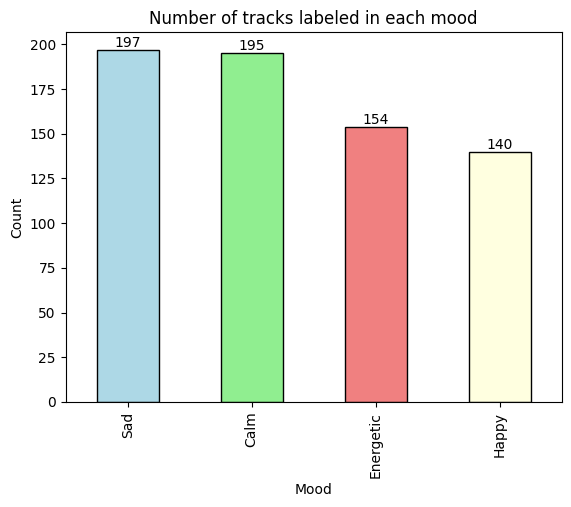

In [117]:
category_counts = df['mood'].value_counts()
colors = ['lightblue', 'lightgreen','lightcoral', 'lightyellow']
ax = category_counts.plot(kind='bar', color=colors, edgecolor='black')
for i, v in enumerate(category_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
plt.title('Number of tracks labeled in each mood')
plt.xlabel('Mood')
plt.ylabel('Count')
plt.show()

**It is also shown that there are no null values in the dataset that needs to be handled**

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   release_date      686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

In [119]:
df.isnull().sum()

name                0
album               0
artist              0
id                  0
release_date        0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
time_signature      0
mood                0
dtype: int64

**Doing  a simple analysis we can look at the mean value of all our attributes for each mood:**

In [120]:
numeric_columns = df.select_dtypes(include='number')

mean_values = numeric_columns.groupby(df['mood']).mean()

print(mean_values)

           popularity         length  danceability  acousticness    energy  \
mood                                                                         
Calm        40.261538  193977.061538      0.406815      0.883348  0.156325   
Energetic   41.603896  215779.948052      0.512240      0.028229  0.883669   
Happy       48.585714  230963.850000      0.622914      0.127849  0.751857   
Sad         37.730964  247504.472081      0.497245      0.578826  0.388068   

           instrumentalness  liveness   valence   loudness  speechiness  \
mood                                                                      
Calm               0.890769  0.115418  0.151421 -20.955826     0.040742   
Energetic          0.056607  0.233897  0.437049  -4.695844     0.079170   
Happy              0.126103  0.201682  0.579095  -7.275750     0.061774   
Sad                0.201832  0.140655  0.289372 -10.569183     0.041736   

                tempo       key  time_signature  
mood                          


**As shown in the above data:**


* Happy mood has the highest average danceability, followed by Energetic, Sad, and Calm

* Calm mood has the highest average acousticness, indicating a tendency towards more acoustic or less electronic sounds. Energetic has the lowest average acousticness

* Energetic mood has the highest average energy, suggesting more lively and energetic tracks. Calm has the lowest energy

* Calm mood has the highest average instrumentalness, suggesting a tendency towards instrumental tracks. Energetic has the lowest average instrumentalness

* Happy mood has the highest average valence, representing the musical positiveness. Sad has the lowest valence

* Calm mood has the lowest average loudness, while Energetic has the highest, indicating a preference for louder tracks in the Energetic mood



# Data Preparation

As mentioned before, we want to study the relationship between mood and music features so we want to exclude attributes that will not be relevant to our mood prediction model.
Attributes that are not directly a musical acoustic feature will be removed like the track name, id, album name, artist, release date, popularity, length and time signature.

In [121]:
df.drop(['name', 'album','artist','id','release_date','popularity','length','liveness','time_signature'], axis=1, inplace = True)
df.head()

,danceability,acousticness,energy,instrumentalness,valence,loudness,speechiness,tempo,key,mood
0,0.866,0.13700,0.730,0.000000,0.625,-8.201,0.0767,118.523,5,Happy
1,0.381,0.01890,0.832,0.196000,0.166,-5.069,0.0492,120.255,8,Sad
2,0.346,0.91300,0.139,0.000077,0.116,-15.326,0.0321,136.168,0,Sad
3,0.466,0.08900,0.438,0.000006,0.587,-12.858,0.0608,193.100,4,Happy
4,0.419,0.00171,0.932,0.000000,0.445,-3.604,0.1060,169.881,1,Energetic


**There are also no duplicate values nor missing values**

In [122]:
num_duplicates = df.duplicated().sum()
num_null = df.isnull().sum()
print(f"\nNumber of Duplicate Rows: {num_duplicates}")
print(f"\nNumber of Null Values: \n{num_null}")



Number of Duplicate Rows: 0

Number of Null Values: 
danceability        0
acousticness        0
energy              0
instrumentalness    0
valence             0
loudness            0
speechiness         0
tempo               0
key                 0
mood                0
dtype: int64


# Modeling

# Random Forest Model

In [123]:
features = df
features.head()

,danceability,acousticness,energy,instrumentalness,valence,loudness,speechiness,tempo,key,mood
0,0.866,0.13700,0.730,0.000000,0.625,-8.201,0.0767,118.523,5,Happy
1,0.381,0.01890,0.832,0.196000,0.166,-5.069,0.0492,120.255,8,Sad
2,0.346,0.91300,0.139,0.000077,0.116,-15.326,0.0321,136.168,0,Sad
3,0.466,0.08900,0.438,0.000006,0.587,-12.858,0.0608,193.100,4,Happy
4,0.419,0.00171,0.932,0.000000,0.445,-3.604,0.1060,169.881,1,Energetic


In [124]:
label_encoder = preprocessing.LabelEncoder()

features['mood']= label_encoder.fit_transform(features['mood'])

features['mood'].unique()
encoded_labels = features['mood']

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Label Encoding Mapping:")
for label, encoded_number in label_mapping.items():
    print(f"{label}: {encoded_number}")

Label Encoding Mapping:
Calm: 0
Energetic: 1
Happy: 2
Sad: 3


In [125]:
target = features.pop('mood')
target.head()

0    2
1    3
2    3
3    2
4    1
Name: mood, dtype: int64

Here we split data into training and testing data, with 80% of the data used for training and 20% used for testing

In [126]:
X = features
y = target
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratified_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Check the distribution of classes in both training and testing sets
print("Distribution of classes in training set:")
print(y_train.value_counts())

print("\nDistribution of classes in testing set:")
print(y_test.value_counts())

Distribution of classes in training set:
3    157
0    156
1    123
2    112
Name: mood, dtype: int64

Distribution of classes in testing set:
3    40
0    39
1    31
2    28
Name: mood, dtype: int64


Here we create a random Forest Model with the training data, and we use the Grid Search tool to performs multiple computations on the hyperparameters and provide an ideal set of hyperparameters that help us achieve better results.  
The hyperparameters that we test on are the n_estimators, which is the number of trees, and the max_depth, which is the maximum depth of the tree, and see which valuse give the best accuracy through trial and error

In [127]:

rf_classifier = RandomForestClassifier()

# hyperparameter grid
param_grid = {
    'n_estimators': [30,35,45,50,55,60],
    'max_depth': [None,5,10,15,20],
}

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 20, 'n_estimators': 50}


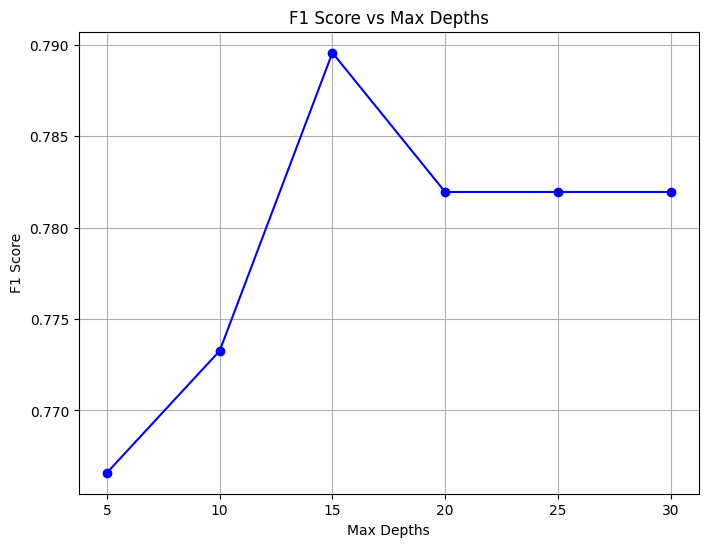

In [128]:
max_depths = [5, 10, 15, 20, 25, 30]
f1_scores = []

for depth in max_depths:

    clf = RandomForestClassifier(max_depth=depth, random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

plt.figure(figsize=(8, 6))
plt.plot(max_depths, f1_scores, marker='o', linestyle='-', color='b')
plt.title('F1 Score vs Max Depths')
plt.xlabel('Max Depths')
plt.ylabel('F1 Score')
plt.xticks(max_depths)
plt.grid(True)
plt.show()

In [129]:
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report_str)

Accuracy: 0.7971014492753623
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.68      0.81      0.74        31
           2       0.68      0.54      0.60        28
           3       0.89      0.82      0.86        40

    accuracy                           0.80       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.80      0.80      0.79       138



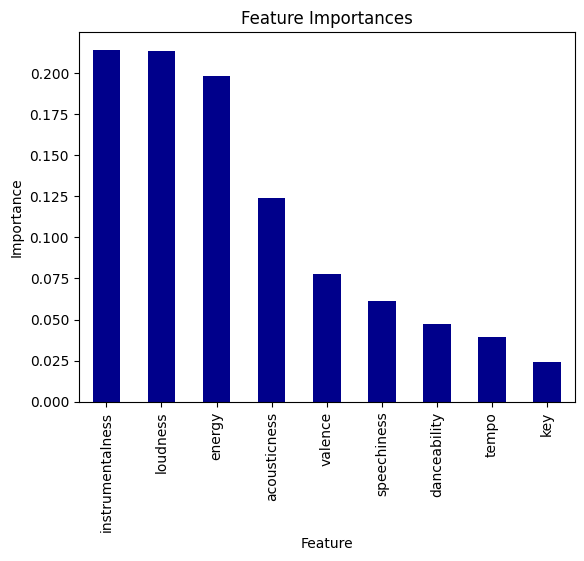

In [130]:
feature_importances = pd.Series(best_rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_importances.plot.bar(color='darkblue');
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

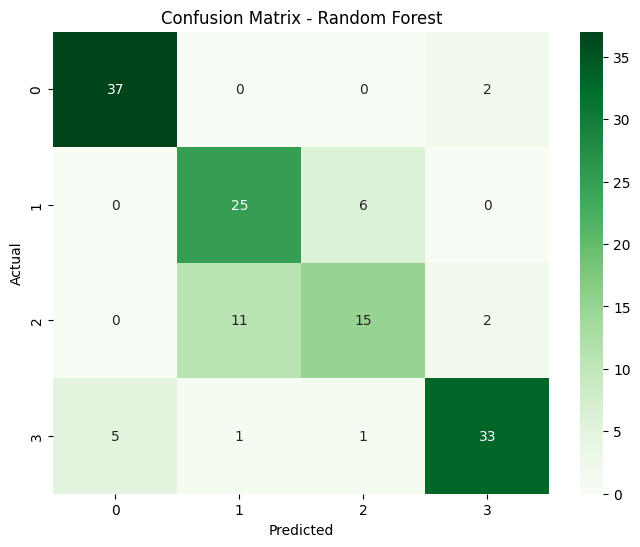

In [131]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# KNN Model

In [132]:
X = features
y = target

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X_standardized, y):
    X1_train, X1_test = X_standardized[train_index], X_standardized[test_index]
    y1_train, y1_test = y[train_index], y[test_index]


knn = KNeighborsClassifier()


param_grid = {'n_neighbors': np.arange(1, 10),
              'weights': ['uniform', 'distance']}

# Perform grid search using cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X1_train, y1_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y1_pred = best_model.predict(X1_test)

# Calculate accuracy and other evaluation metrics
accuracy1 = accuracy_score(y1_test, y1_pred)
classification_report_str1 = classification_report(y1_test, y1_pred)

# Print the results
print("Accuracy:", accuracy1)
print("Classification Report:\n", classification_report_str1)

Best Hyperparameters: {'n_neighbors': 9, 'weights': 'distance'}
Accuracy: 0.7753623188405797
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88        39
           1       0.68      0.74      0.71        31
           2       0.65      0.61      0.63        28
           3       0.94      0.72      0.82        40

    accuracy                           0.78       138
   macro avg       0.77      0.76      0.76       138
weighted avg       0.78      0.78      0.77       138



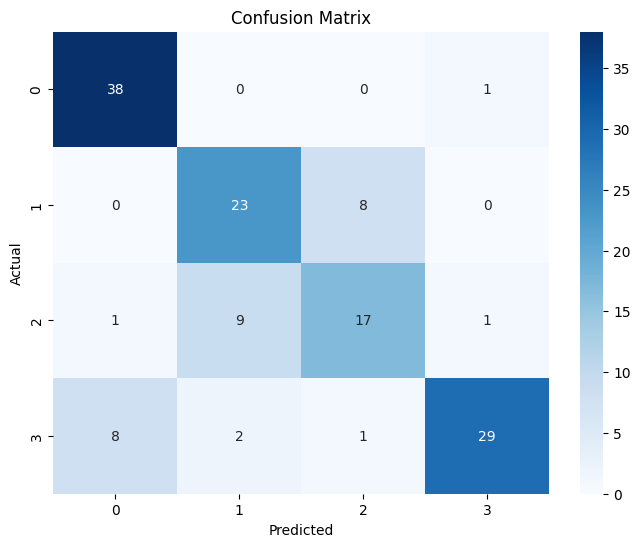

In [133]:
conf_matrix = confusion_matrix(y1_test, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluation

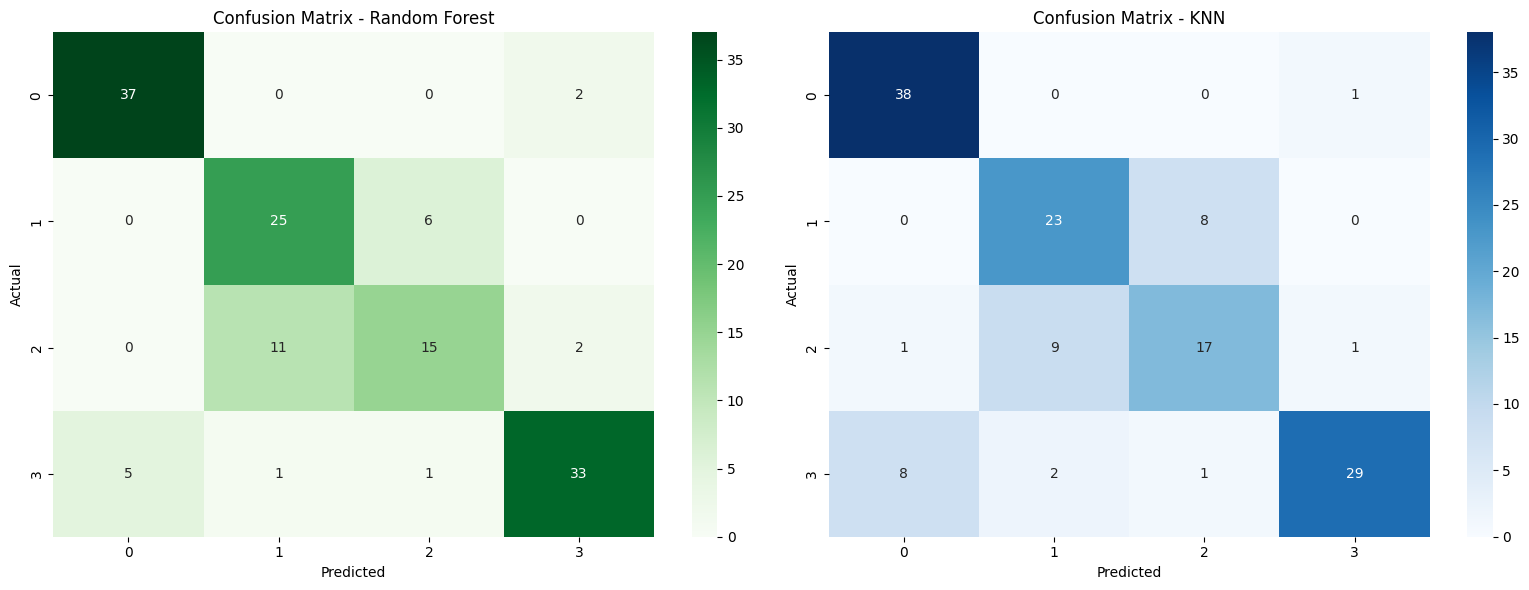

In [134]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
X_train_array = np.array(X_train)

conf_matrix_rf = confusion_matrix(y_test, best_rf_model.predict(X_test))

conf_matrix_knn = confusion_matrix(y_test, best_model.predict(X1_test))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_, ax=axes[0])
axes[0].set_title('Confusion Matrix - Random Forest')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')



sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_, ax=axes[1])
axes[1].set_title('Confusion Matrix - KNN')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [135]:
print("Classification Report Random Forest:\n", classification_report_str)
print("Accuracy for Random Forest:", accuracy)
print("Classification Report K-NN:\n", classification_report_str1)
print("Accuracy for K-NN Model:", accuracy1)


Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.68      0.81      0.74        31
           2       0.68      0.54      0.60        28
           3       0.89      0.82      0.86        40

    accuracy                           0.80       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.80      0.80      0.79       138

Accuracy for Random Forest: 0.7971014492753623
Classification Report K-NN:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88        39
           1       0.68      0.74      0.71        31
           2       0.65      0.61      0.63        28
           3       0.94      0.72      0.82        40

    accuracy                           0.78       138
   macro avg       0.77      0.76      0.76       138
weighted avg       0.78      0.78      0.77       138

Accuracy for K-N